In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [91]:
csv_path = '/content/isolated.csv'

In [92]:
np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
path_XYs = []
for i in np.unique(np_path_XYs[:, 0]):
    npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
    XYs = []
    for j in np.unique(npXYs[:, 0]):
        XY = npXYs[npXYs[:, 0] == j][:, 1:]
        XYs.append(XY)
    path_XYs.append(XYs)
curves = path_XYs

In [93]:
def plot_curve(curves):
  fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
  colors = plt.cm.rainbow(np.linspace(0, 1, len(curves)))
  for XYs, c in zip(curves, colors):
      for XY in XYs:
          ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
  ax.set_aspect('equal')
  plt.show()

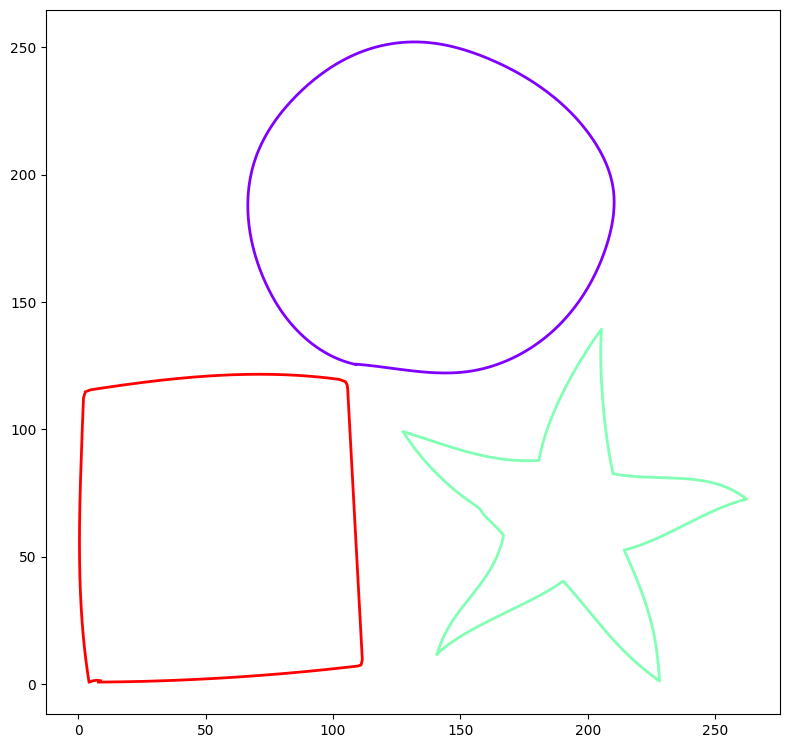

In [94]:
plot_curve(curves)

In [97]:
curves

[[array([[109.14299774, 125.58000183],
         [110.15747833, 125.49578094],
         [111.17194366, 125.40398407],
         [112.18638611, 125.30522156],
         [113.20079041, 125.20011139],
         [114.21517181, 125.08926392],
         [115.22950745, 124.97328949],
         [116.2437973 , 124.85279083],
         [117.25804138, 124.72838593],
         [118.27222443, 124.60068512],
         [119.28635406, 124.47029877],
         [120.30041504, 124.33782959],
         [121.31440735, 124.2039032 ],
         [122.32831573, 124.06912231],
         [123.34214783, 123.93410492],
         [124.355896  , 123.79945374],
         [125.36954498, 123.66577911],
         [126.38310242, 123.53369141],
         [127.39655304, 123.40380859],
         [128.40989685, 123.27674103],
         [129.42312622, 123.15309143],
         [130.43623352, 123.03347778],
         [131.44923401, 122.91851044],
         [132.46208191, 122.80879974],
         [133.47480774, 122.70494843],
         [134.48739624, 1

In [98]:
def cubic_bezier(t, p0, p1, p2, p3):
    return (1-t)**3 * p0 + 3*(1-t)**2*t * p1 + 3*(1-t)*t**2 * p2 + t**3 * p3

In [99]:
points = np.array(curves[0]).reshape(-1, 2)

In [100]:
start_point = points[0]
end_point = points[-1]
control_points = np.array([points[1], points[2], points[2], points[1]])

In [101]:
import matplotlib.pyplot as plt

def plot_curve(points, control_points):
  # Generate t values
  t_values = np.linspace(0, 1, 100)

  # Calculate points on the curve
  x_values = [cubic_bezier(t, *control_points)[0] for t in t_values]
  y_values = [cubic_bezier(t, *control_points)[1] for t in t_values]

  print(x_values)
  print(y_values)

  # Plot the curve
  plt.plot(x_values, y_values, label='Approximated Path')
  plt.scatter(points[:, 0], points[:, 1], label='Points', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Approximation Using Cubic Bézier Curve')
  plt.legend()
  plt.grid(True)
  plt.axis('equal')
  plt.show()


[110.15747833251953, 110.18790918729121, 110.2177190042104, 110.24690778327711, 110.27547552449133, 110.30342222785308, 110.33074789336233, 110.35745252101911, 110.38353611082341, 110.40899866277519, 110.43384017687455, 110.45806065312136, 110.48166009151575, 110.50463849205764, 110.52699585474701, 110.54873217958395, 110.56984746656835, 110.5903417157003, 110.61021492697974, 110.62946710040674, 110.64809823598127, 110.66610833370324, 110.68349739357278, 110.7002654155898, 110.71641239975439, 110.73193834606644, 110.74684325452606, 110.76112712513319, 110.7747899578878, 110.78783175278994, 110.80025250983961, 110.81205222903678, 110.82323091038145, 110.8337885538737, 110.84372515951344, 110.85304072730068, 110.86173525723542, 110.86980874931776, 110.87726120354752, 110.8840926199248, 110.89030299844966, 110.89589233912203, 110.90086064194188, 110.90520790690927, 110.9089341340242, 110.91203932328658, 110.9145234746965, 110.91638658825396, 110.91762866395892, 110.9182497018114, 110.9182

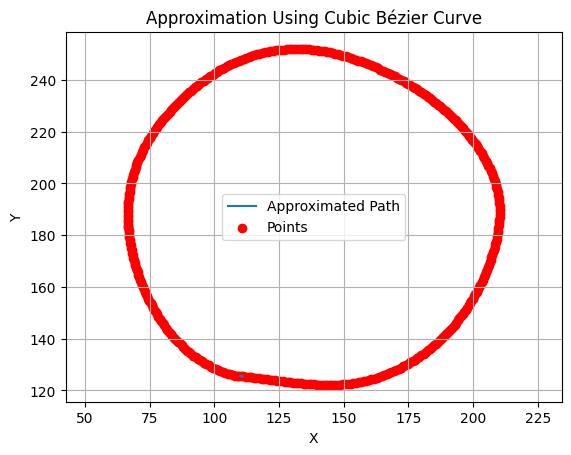

In [102]:
plot_curve(points, control_points)

[110.15747833251953, 110.18790918729121, 110.2177190042104, 110.24690778327711, 110.27547552449133, 110.30342222785308, 110.33074789336233, 110.35745252101911, 110.38353611082341, 110.40899866277519, 110.43384017687455, 110.45806065312136, 110.48166009151575, 110.50463849205764, 110.52699585474701, 110.54873217958395, 110.56984746656835, 110.5903417157003, 110.61021492697974, 110.62946710040674, 110.64809823598127, 110.66610833370324, 110.68349739357278, 110.7002654155898, 110.71641239975439, 110.73193834606644, 110.74684325452606, 110.76112712513319, 110.7747899578878, 110.78783175278994, 110.80025250983961, 110.81205222903678, 110.82323091038145, 110.8337885538737, 110.84372515951344, 110.85304072730068, 110.86173525723542, 110.86980874931776, 110.87726120354752, 110.8840926199248, 110.89030299844966, 110.89589233912203, 110.90086064194188, 110.90520790690927, 110.9089341340242, 110.91203932328658, 110.9145234746965, 110.91638658825396, 110.91762866395892, 110.9182497018114, 110.9182

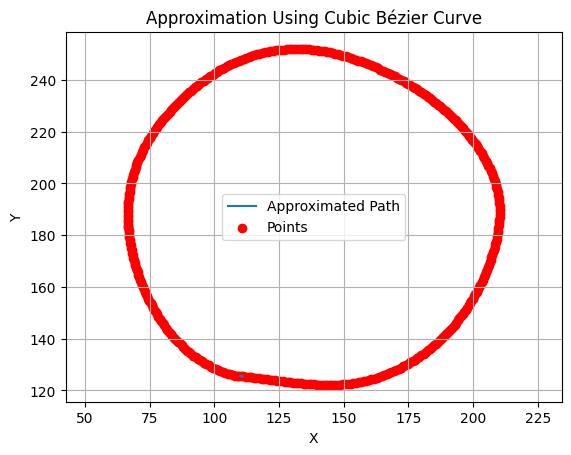

[141.4567413330078, 141.4758812256607, 141.49463050825938, 141.51298918080397, 141.53095724329438, 141.5485346957307, 141.56572153811285, 141.5825177704409, 141.59892339271477, 141.61493840493443, 141.63056280710006, 141.64579659921148, 141.66063978126883, 141.67509235327202, 141.68915431522103, 141.70282566711597, 141.71610640895668, 141.7289965407433, 141.74149606247576, 141.75360497415414, 141.76532327577834, 141.77665096734836, 141.7875880488643, 141.79813452032604, 141.8082903817337, 141.81805563308717, 141.8274302743866, 141.8364143056318, 141.84500772682287, 141.85321053795977, 141.8610227390426, 141.86844433007124, 141.87547531104573, 141.88211568196616, 141.8883654428324, 141.89422459364448, 141.89969313440244, 141.9047710651063, 141.90945838575593, 141.91375509635142, 141.91766119689288, 141.92117668738015, 141.92430156781322, 141.92703583819224, 141.9293794985171, 141.93133254878776, 141.9328949890043, 141.93406681916676, 141.93484803927504, 141.93523864932916, 141.935238649

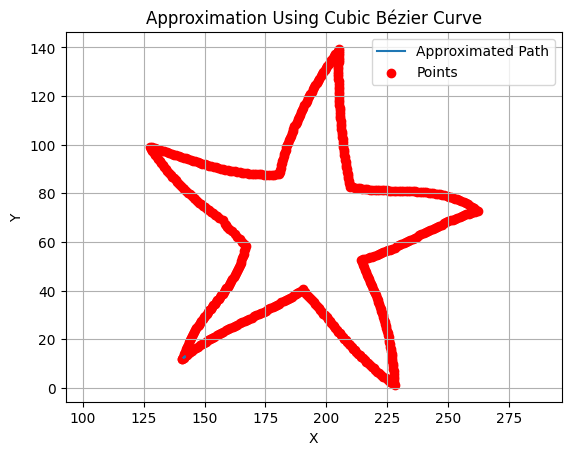

[8.989509582519531, 9.019791450418753, 9.049455321013909, 9.078501194305002, 9.106929070292022, 9.13473894897498, 9.161930830353876, 9.188504714428703, 9.214460601199468, 9.23979849066616, 9.264518382828793, 9.288620277687354, 9.312104175241855, 9.334970075492288, 9.357217978438653, 9.378847884080958, 9.399859792419191, 9.42025370345336, 9.440029617183463, 9.459187533609505, 9.477727452731479, 9.495649374549382, 9.512953299063225, 9.529639226272998, 9.54570715617871, 9.56115708878035, 9.57598902407793, 9.590202962071444, 9.603798902760888, 9.61677684614627, 9.629136792227586, 9.640878741004833, 9.652002692478016, 9.662508646647135, 9.672396603512189, 9.681666563073174, 9.690318525330095, 9.69835249028295, 9.70576845793174, 9.712566428276459, 9.71874640131712, 9.724308377053712, 9.729252355486237, 9.733578336614697, 9.737286320439093, 9.74037630695942, 9.742848296175682, 9.74470228808788, 9.745938282696011, 9.746556280000076, 9.746556280000078, 9.745938282696011, 9.74470228808788, 9.742

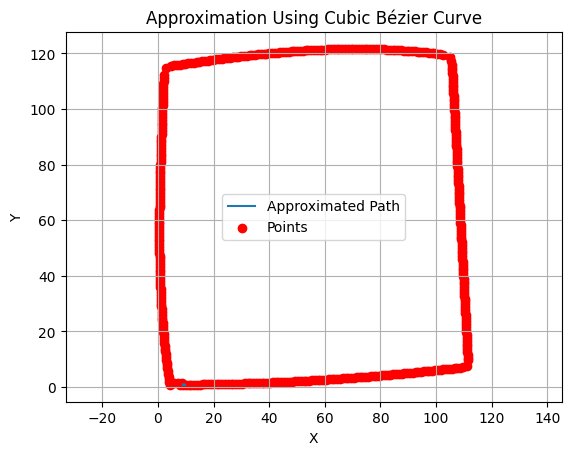

In [103]:
for curve in curves:
  points=np.array(curve).reshape(-1, 2)
  start_point = points[0]
  end_point = points[-1]
  control_points = np.array([points[1], points[2], points[2], points[1]])
  plot_curve(points, control_points)


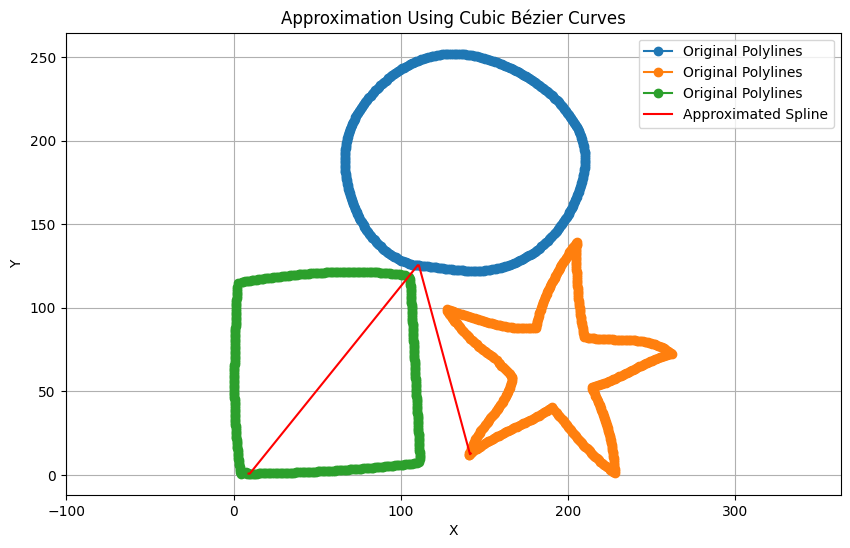

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def approximate_with_bezier(curves):
    bezier_curves = []
    for curve in curves:
        if isinstance(curve, list):
            curve = np.array(curve)
        points = curve.reshape(-1, 2)
        start_point = points[0]
        end_point = points[-1]
        control_points = np.array([points[1], points[2], points[2], points[1]])

        t_values = np.linspace(0, 1, 100)
        x_values = [cubic_bezier(t, *control_points)[0] for t in t_values]
        y_values = [cubic_bezier(t, *control_points)[1] for t in t_values]

        bezier_curves.append(np.column_stack((x_values, y_values)))

    all_bezier_curves = np.concatenate(bezier_curves)

    all_bezier_curves = all_bezier_curves[all_bezier_curves[:, 0].argsort()]

    return all_bezier_curves

def cubic_bezier(t, p0, p1, p2, p3):
    return (1-t)**3 * p0 + 3*(1-t)**2*t * p1 + 3*(1-t)*t**2 * p2 + t**3 * p3

approximated_spline = approximate_with_bezier(curves)

curves = [np.array(curve) if not isinstance(curve, np.ndarray) else curve for curve in curves]

plt.figure(figsize=(10, 6))

for curve in curves:
    plt.plot(*curve.T, 'o-', label='Original Polylines')

plt.plot(approximated_spline[:, 0], approximated_spline[:, 1], '-r', label='Approximated Spline')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Approximation Using Cubic Bézier Curves')
plt.grid(True)
plt.axis('equal')
plt.show()

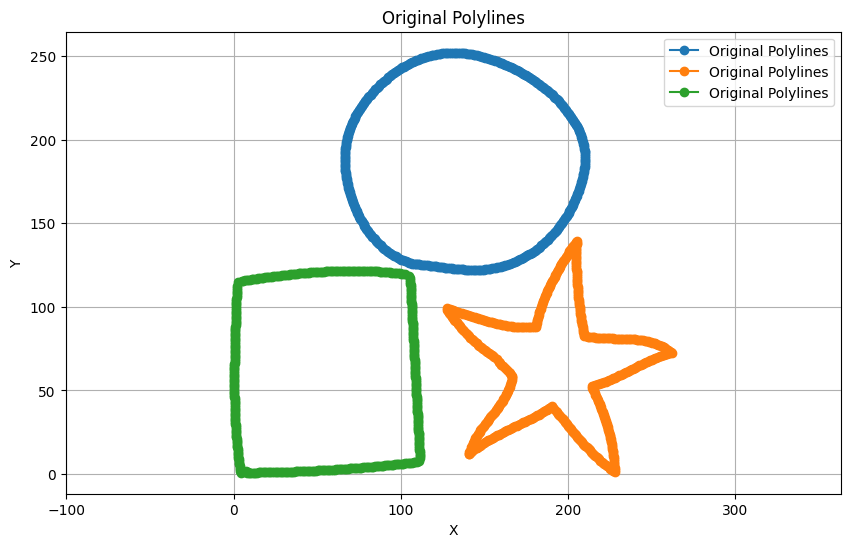

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def plot_original_polylines(curves):
    plt.figure(figsize=(10, 6))

    for curve in curves:
        plt.plot(*curve.T, 'o-', label='Original Polylines')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Polylines')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_original_polylines(curves)


In [115]:
curves[0]

array([[[109.14299774, 125.58000183],
        [110.15747833, 125.49578094],
        [111.17194366, 125.40398407],
        [112.18638611, 125.30522156],
        [113.20079041, 125.20011139],
        [114.21517181, 125.08926392],
        [115.22950745, 124.97328949],
        [116.2437973 , 124.85279083],
        [117.25804138, 124.72838593],
        [118.27222443, 124.60068512],
        [119.28635406, 124.47029877],
        [120.30041504, 124.33782959],
        [121.31440735, 124.2039032 ],
        [122.32831573, 124.06912231],
        [123.34214783, 123.93410492],
        [124.355896  , 123.79945374],
        [125.36954498, 123.66577911],
        [126.38310242, 123.53369141],
        [127.39655304, 123.40380859],
        [128.40989685, 123.27674103],
        [129.42312622, 123.15309143],
        [130.43623352, 123.03347778],
        [131.44923401, 122.91851044],
        [132.46208191, 122.80879974],
        [133.47480774, 122.70494843],
        [134.48739624, 122.60758209],
        [135

In [106]:
starting_point = curves[0][0][0]
ending_point = curves[0][0][-1]

In [107]:
starting_point

array([109.14299774, 125.58000183])

In [108]:
ending_point

array([109.0039978 , 125.43399811])

In [109]:
X = curves[0][0][:, 0]
Y = curves[0][0][:, 1]

In [110]:
import numpy as np
from scipy.special import comb

def get_bezier_parameters(X, Y, degree=3):
    if degree < 1:
        raise ValueError('degree must be 1 or greater.')
    if len(X) != len(Y):
        raise ValueError('X and Y must be of the same length.')
    if len(X) < degree + 1:
        raise ValueError(f'There must be at least {degree + 1} points to '
                         f'determine the parameters of a degree {degree} curve.'
                         f'Got only {len(X)} points.')

    def bpoly(n, t, k):
        return t ** k * (1 - t) ** (n - k) * comb(n, k)

    def bmatrix(T):
        return np.matrix([[bpoly(degree, t, k) for k in range(degree + 1)] for t in T])

    def least_square_fit(points, M):
        M_ = np.linalg.pinv(M)
        return M_ * points

    T = np.linspace(0, 1, len(X))
    M = bmatrix(T)
    points = np.array(list(zip(X, Y)))

    final = least_square_fit(points, M).tolist()
    final[0] = [X[0], Y[0]]  # Ensure the first point is the start point
    final[len(final)-1] = [X[len(X)-1], Y[len(Y)-1]]  # Ensure the last point is the end point
    return final

In [111]:
control_points = get_bezier_parameters(X, Y)

In [112]:
print("Starting Point:", starting_point)
print("Ending Point:", ending_point)
print("Control Points:", control_points)

Starting Point: [109.14299774 125.58000183]
Ending Point: [109.0039978  125.43399811]
Control Points: [[109.14299774169922, 125.58000183105469], [425.620302693569, 175.51737572884042], [-68.20868880640833, 377.87014392781646], [109.00399780273438, 125.43399810791016]]


In [116]:
!pip install numpy shapely

In [153]:
import numpy as np
from shapely.geometry import LineString

def simplify_shape(points):
    # Convert the list of points to a LineString object
    line = LineString(points)

    # Simplify the LineString using the Douglas-Peucker algorithm
    simplified_line = line.simplify(tolerance=0.01)  # Adjust tolerance as needed

    # Convert the simplified LineString back to a list of points
    simplified_points = np.array(simplified_line.coords).tolist()

    return simplified_points

# Example usage
points = curves[0][0] # Add all your points here
simplified_points = simplify_shape(points)

print("Simplified Points:", simplified_points)


Simplified Points: [[109.14299774169922, 125.58000183105469], [112.18638610839844, 125.30522155761719], [115.22950744628906, 124.9732894897461], [119.2863540649414, 124.47029876708984], [128.40989685058594, 123.27674102783203], [131.44923400878906, 122.91851043701172], [133.4748077392578, 122.70494842529297], [136.5121307373047, 122.4347152709961], [138.53623962402344, 122.29509735107422], [140.55967712402344, 122.193603515625], [141.57113647460938, 122.15868377685547], [143.59349060058594, 122.12354278564453], [145.61509704589844, 122.13874816894531], [146.62559509277344, 122.16675567626953], [148.6459503173828, 122.26664733886719], [149.6558074951172, 122.3397445678711], [151.67483520507812, 122.53530883789062], [152.6840057373047, 122.65899658203125], [154.7144012451172, 122.96405792236328], [156.73077392578125, 123.34232330322266], [157.73316955566406, 123.55842590332031], [159.72528076171875, 124.0436019897461], [161.69911193847656, 124.5981216430664], [162.67861938476562, 124.900

In [154]:
simplified_array = np.array(simplified_points)

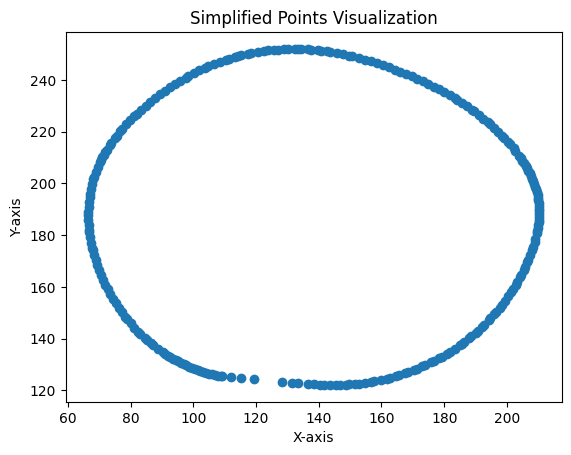

In [155]:
import matplotlib.pyplot as plt

x_values = simplified_array[:, 0]
y_values = simplified_array[:, 1]

plt.scatter(x_values, y_values)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Simplified Points Visualization')

plt.show()


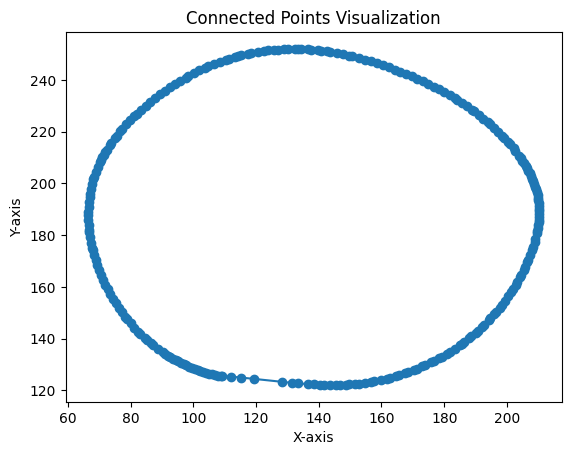

In [156]:
plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Connected Points Visualization')

plt.show()


In [139]:
import numpy as np
from scipy.optimize import least_squares
from scipy.spatial.distance import cdist

def fit_circle_to_points(points):
    """
    Fits a circle to a set of points using least squares.

    :param points: An Nx2 array of points.
    :return: A tuple (center_x, center_y, radius) representing the fitted circle.
    """
    def residual(params, points):
        """
        Residual function for least squares optimization.

        :param params: Tuple (center_x, center_y, radius).
        :param points: An Nx2 array of points.
        :return: Residuals as a 1D array.
        """
        center_x, center_y, radius = params
        dist_matrix = cdist(points, [(center_x, center_y)])
        # Extract the diagonal elements of the distance matrix
        distances = dist_matrix.diagonal()
        return distances - radius

    # Initial guess for the circle parameters
    initial_guess = (np.mean(points[:, 0]), np.mean(points[:, 1]), np.std(points))

    # Perform least squares optimization
    result = least_squares(residual, initial_guess, args=(points,))

    # Extract optimized parameters
    center_x, center_y, radius = result.x

    return center_x, center_y, radius

def is_fit_circular(points, threshold=0.01):
    """
    Determines if the fitted circle is likely to represent a true circle.

    :param points: An Nx2 array of points.
    :param threshold: Maximum allowed mean residual.
    :return: True if the fit is likely a circle, False otherwise.
    """
    # Fit a circle to the points
    center_x, center_y, radius = fit_circle_to_points(points)

    # Calculate the residuals
    residuals = cdist(points, [(center_x, center_y)]) - radius

    # Check if the mean residual is within the threshold
    mean_residual = np.mean(np.abs(residuals))
    return mean_residual <= threshold

# Example usage
points = simplified_array
is_circle = is_fit_circular(points)
if is_circle:
    print("The shape is likely to be a circle.")
else:
    print("The shape is not a circle.")


The shape is not a circle.


In [140]:
!pip install circle_fit

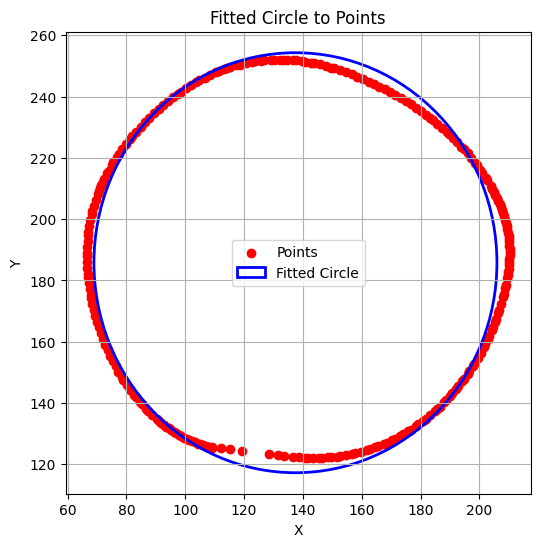

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import circle_fit as cf

points = simplified_array

xc, yc, r, _ = cf.least_squares_circle(points)

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points')
plt.gca().add_patch(plt.Circle((xc, yc), r, fill=False, color='blue', linewidth=2, label='Fitted Circle'))
plt.legend()
plt.grid(True)
plt.title('Fitted Circle to Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [158]:
sq = simplify_shape(curves[2][0])

In [160]:
square = np.array(sq)

In [173]:
s= np.array(curves[2][0])

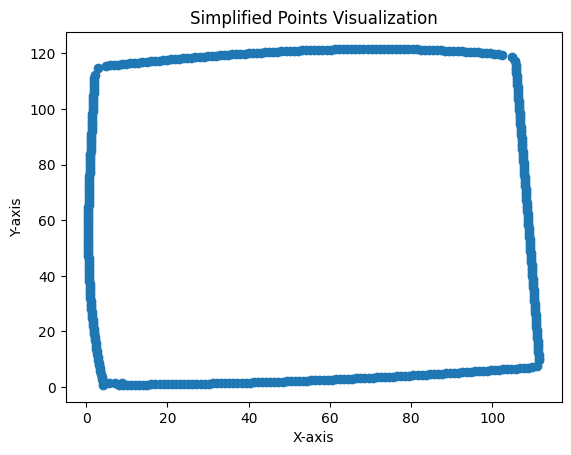

In [174]:
# Extract x and y coordinates
x_values = s[:, 0]
y_values = s[:, 1]

# Create a scatter plot
plt.scatter(x_values, y_values)

# Label the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Give a title to the plot
plt.title('Simplified Points Visualization')

# Show the plot
plt.show()


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, ConvexHull

def find_rectangle_corners(points):
    tri = Delaunay(points)

    hull_points = ConvexHull(points).vertices

    corners = [hull_points[[0, 1]], hull_points[[2, 3]]]

    return corners

# Example usage
points = s
corners = find_rectangle_corners(points)
print("Detected corners:", corners)


Detected corners: [array([208, 209], dtype=int32), array([210, 211], dtype=int32)]


In [188]:
import numpy as np

def extend_rectangle_with_diagonal(corner1, corner2):
    """
    Extend the rectangle by finding the other two corners given one diagonal.
    """
    # Calculate the midpoint of the diagonal
    mid_point = np.mean([corner1, corner2], axis=0)

    # Calculate the vector from the known corner to the midpoint
    vector_to_midpoint = mid_point - corner1

    # Reflect this vector through the midpoint to get the vector to the other unknown corner
    vector_to_other_corner = -vector_to_midpoint

    # Add this vector to the midpoint to find the other unknown corner
    other_unknown_corner = mid_point + vector_to_other_corner

    # The fourth corner is the reflection of the second corner through the midpoint
    fourth_corner = mid_point + (-1) * vector_to_other_corner

    return other_unknown_corner, fourth_corner

# Example usage
known_corners = corners  # Known corners
other_unknown_corner, fourth_corner = extend_rectangle_with_diagonal(known_corners[0], known_corners[1])

print("Other Unknown Corner:", other_unknown_corner)
print("Fourth Corner:", fourth_corner)


Other Unknown Corner: [208. 209.]
Fourth Corner: [210. 211.]


In [189]:
corn = np.concatenate((corners, [other_unknown_corner, fourth_corner]), axis=0)

In [190]:
corn

array([[208., 209.],
       [210., 211.],
       [208., 209.],
       [210., 211.]])

In [191]:
def fit_rect(corners):
  x_coords = [c[0] for c in corners]
  y_coords = [c[1] for c in corners]

  # Plotting
  fig, ax = plt.subplots()
  ax.scatter(x_coords, y_coords, color='red')  # Plot corners
  ax.plot([x_coords[0], x_coords[2], x_coords[3], x_coords[1], x_coords[0]], [y_coords[0], y_coords[2], y_coords[3], y_coords[1], y_coords[0]], color='blue')  # Plot rectangle sides

  # Measure sides
  side1 = np.sqrt((corners[1][0]-corners[0][0])**2 + (corners[1][1]-corners[0][1])**2)
  side2 = np.sqrt((corners[2][0]-corners[1][0])**2 + (corners[2][1]-corners[1][1])**2)
  side3 = np.sqrt((corners[3][0]-corners[2][0])**2 + (corners[3][1]-corners[2][1])**2)
  side4 = np.sqrt((corners[0][0]-corners[3][0])**2 + (corners[0][1]-corners[3][1])**2)

  # Check if sides are approximately equal
  print(f"Sides: {side1:.2f}, {side2:.2f}, {side3:.2f}, {side4:.2f}")
  print(f"Is rectangle? {'Yes' if side1 == side2 and side2 == side3 and side3 == side4 else 'No'}")

  plt.title('Rectangle Visualization')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.grid(True)
  plt.show()


Sides: 2.83, 2.83, 2.83, 2.83
Is rectangle? Yes


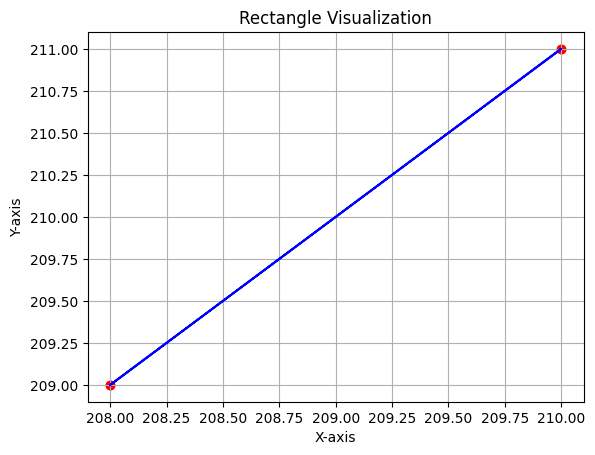

In [192]:
fit_rect(corn)